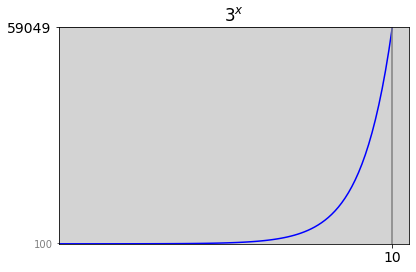

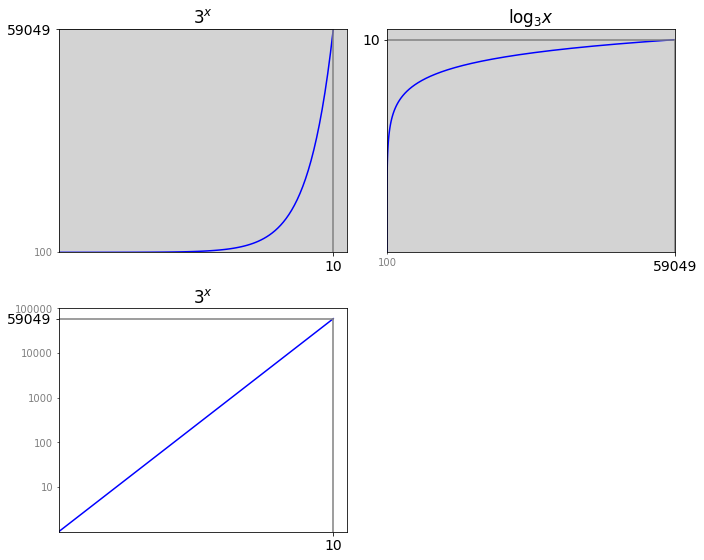

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os

FONTSIZE = 14
GIF_FRAME_RATE = 1
TEMPGIFNAME = 'delme'
BASE = 3
MIN_X = 1
MAX_X = 10
PLOT_MIN_X = 0
PLOT_MAX_X = MAX_X + 0.5
XPOS = np.arange(MIN_X, MAX_X+1)
YPOS = np.power(BASE, XPOS)
YGRID = 100


def make_gif(file_name, full = False):

    plt.rc('font', size=FONTSIZE)

    if full:
        fig, ((expax, logax), (explogax, emptyax)) = plt.subplots(2, 2, figsize=(10,8))
    else:
        fig, expax = plt.subplots()

    # plot and save individual gif frames
    tempgiffiles = []
    for i in range(len(XPOS)):
        # plot the exponential growth
        expax.clear()
        max_y = max(1000, YPOS[i] + YGRID)
        hlines = np.arange(YGRID, max_y, YGRID)
        expax.hlines(hlines, PLOT_MIN_X, PLOT_MAX_X,  'lightgray')
        xplot = np.linspace(PLOT_MIN_X, XPOS[i], 100)
        yplot = np.power(BASE, xplot)
        expax.plot(xplot, yplot, 'b-')
        expax.plot(np.full(2, XPOS[i]), (0, YPOS[i]), 'gray')
        expax.set_yticks((YGRID,), minor=True)
        expax.set_yticklabels((f'{YGRID}',), minor=True, color='gray', fontsize=FONTSIZE-4)
        expax.set_yticks((YPOS[i],))
        expax.set_xticks((XPOS[i],))
        expax.plot((0, XPOS[i]), np.full(2, YPOS[i]), 'gray')
        expax.set_xlim((PLOT_MIN_X, PLOT_MAX_X))
        expax.set_ylim((0, max_y))
        expax.set_title('$3^x$')
        if full:
            # plot logarithm
            logax.clear()
            logax.vlines(hlines, PLOT_MIN_X, PLOT_MAX_X,  'lightgray')
            logax.plot(yplot, xplot, 'b-')
            logax.plot(np.full(2, YPOS[i]), (0, XPOS[i]), 'gray')
            logax.set_xticks((YPOS[i],))
            logax.plot((0, YPOS[i]), np.full(2, XPOS[i]), 'gray')
            logax.set_yticks((XPOS[i],))
            logax.set_xticks((YGRID,), minor=True)
            logax.set_xticklabels((f'{YGRID}',), minor=True, color='gray', fontsize=FONTSIZE-4)
            logax.set_ylim((PLOT_MIN_X, PLOT_MAX_X))
            logax.set_xlim((0, max_y))
            logax.set_title('$\log_3 x$')
            # plot exponential growth in logarithmic axis
            explogax.clear()
            explogax.semilogy(xplot, yplot, 'b-')
            explogax.semilogy(np.full(2, XPOS[i]), (0, YPOS[i]), 'gray')
            explogax.semilogy((0, XPOS[i]), np.full(2, YPOS[i]), 'gray')
            explogax.set_xticks((XPOS[i],))
            explogax.set_yticks((YPOS[i],))
            explogax.set_yticklabels((f'{YPOS[i]}',))
            explogax.set_yticks((10,100,1000,10000,100000), minor=True)
            explogax.set_yticklabels(('10','100','1000','10000','100000'), minor=True, color='gray', fontsize=FONTSIZE-4)
            explogax.set_xlim((PLOT_MIN_X, PLOT_MAX_X))
            explogax.set_ylim((1, 100000))
            explogax.set_title('$3^x$')
            # empty axis
            emptyax.set_visible(False)

        # save gif frame
        tempgiffiles.append(TEMPGIFNAME + '%i.png' % i)
        plt.savefig(tempgiffiles[-1])

    # make gif
    with imageio.get_writer(file_name, mode='I', format='GIF', duration=1) as writer:
        for tempgiffile in tempgiffiles:
            image = imageio.imread(tempgiffile)
            writer.append_data(image)
            os.remove(tempgiffile)

make_gif('exp.gif')
make_gif('expandlog.gif', full=True)